In [1]:
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
# %matplotlib notebook
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
def f2(x,y):
    return x**4 + y**4 - 2*(x-y)**2
    #return 14*x**2 - 2*x**3 + 2*y**2 + 4*x*y

In [3]:
Dx = lambda f,x,y,h=1e-5: (f(x+h,y) - f(x-h,y))/(2*h)
Dy = lambda f,x,y,h=1e-5: (f(x,y+h) - f(x,y-h))/(2*h)

In [4]:
x0, y0 = 0.5,0.1

In [5]:
Gradient = lambda f,x,y: np.array([Dx(f,x,y),Dy(f,x,y)])
Gradient(f2,x0,y0)

array([-1.1  ,  1.604])

In [6]:
def Minimizer(f, N = 100, gamma = 0.01, eta = 0.6):

    r = np.zeros((N,2))
    r[0] = np.random.uniform(-5.,5.,size=2)

    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])

    # We save the gradient in each step

    for i in range(1,N):
      r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1])

      Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])



    return r,Grad
def Minimizer2(f, N = 100, gamma = 0.01, eta = 0.6):

    r = np.zeros((N,2))
    r[0] = np.random.uniform(-5.,5.,size=2)

    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])

    # We save the gradient in each step

    for i in range(1,N):
      if i <= 2:
        delta_r=0
      else :
        delta_r=r[i-2]-r[i-3]
      r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1]) + eta*delta_r

      Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])



    return r,Grad

In [8]:
def metric(r):
  return np.linalg.norm(r[-1]-r[-2])

In [14]:
convergence1=[]
convergence2=[]
for N in range(3,1000):
  r, _ = Minimizer(f2,N, gamma=0.001)
  convergence1.append(metric(r))
  r, _ = Minimizer2(f2,N, gamma = 0.001, eta = 0.6)
  convergence2.append(metric(r))


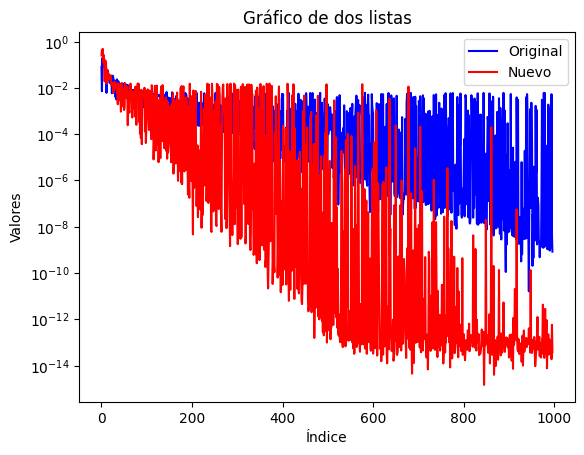

In [15]:
import matplotlib.pyplot as plt
# Graficar la primera lista en azul y la segunda lista en rojo.
plt.plot(convergence1, label='Original', color='blue')
plt.plot(convergence2, label='Nuevo', color='red')

# Agregar etiquetas al gráfico y al eje x.
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfico de dos listas')

# Agregar una leyenda para distinguir las dos listas.
plt.legend()

plt.yscale('log')

# Mostrar el gráfico.
plt.show()

In [22]:
tol=1e-5

metrica =1
i=3
while ( metrica > tol ):
  r, _ = Minimizer(f2,i, gamma=0.001)
  metrica=metric(r)
  i=i+1
print(i)

metrica=1
i=3
while ( metrica > tol ):
  r, _ = Minimizer2(f2,i, gamma=0.001, eta= 0.6)
  metrica=metric(r)
  i=i+1
print(i)


369
145
